<a href="https://colab.research.google.com/github/jhonysmf/MVP_Jhonys-Machado_Sprint_AED/blob/main/MVP_AED__Jhonys_Machado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP - Sprint: Análise Exploratória e Pré-processamento de Dados
### Aluno: Jhonys Machado de Freitas

Trabalho realizado como forma avaliativa da sprint  Análise Exploratória e Pré-processamento de dados, do curso de Ciência de Dados e Analytics da PUC-Rio.

A base de dados escolhida foi a "Heart Disease Dataset" disponível em: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data.

Todo o pré-processamento e análise exploratória dos dados neste trabalho foram feitas utilizando a linguagem Python e as bibliotecas Pandas, Matplotlib, Numpy e Seaborn.

## Respostas para o checklist sugerido:
### Definição do problema

Objetivo: Realizar uma análise exploratória ao banco de dados para verificação da consistencia dos dados.

1. *Qual é a descrição do problema?*<br>
O dataset Heart Disease Dataset, disponivel no Kaggle é uma base de dados extremamente usada para a criação e exploração de modelos de Machine Learning. O dataset apresenta informações sobre diagnósticos de pessoas com doenças cardíacas baseado numa série de resultados de exames e caracteristicas dos pacientes, como medida de colesterol, açúcar no sangue, sexo e idade.
Este trabalho tem o objetivo de fazer uma análise para verificação dos dados presentes no dataset, comparando os valores para o grupo de pessoas com doenças cardícas e sem doenças cardícas de acordo com os resultados apresentados no próprio dataset (coluna 'output' ou coluna 'Resultado').

2. *Este é um problema de aprendizado supervisionado ou não supervisionado?*<br>
Os dados do dataset são normalmente usados para aprendizado supervisionado.

3. *Que premissas ou hipóteses você tem sobre o problema?*<br>
A hípotese é que podem existir dados incoenrentes ou dados inconclusivos no dataset.

4. *Que restrições ou condições foram impostas para selecionar os dados?*<br>
Os dados foram selecionados, inicialmente, por já terem sido usados por mim para o MVP da disciplina de Machine Learning deste mesmo curso. No caso deste trabalho foram selecionadas as colunas cujos resultados pudessem ser mínimamente interpretados dentro do contexto do dataset e do trabalho em si. Portanto, foram selecionadas as colunas: Idade,Sexo, Pressão arterial no repouso, Colesterol, Açúcar no sangue, Eletrocardiograma em repouso, Frequência máxima cardíaca e Angina por exercício físico.

5. *Defina cada um dos atributos do dataset.*
**Idade**: Idade do paciente medida em anos.<br>
**Sexo**: 0 = feminino, 1 = masculino<br>
**Pres no repouso**: Pressão arterial aferida em mmHG<br>
**Colesterol**: medida do colesterol em mg/dl<br>
**Açúcar no sangue**: Concnetração de acúcar no sangue > 120 mg/dl (1 = sim; 0 = não)<br>
**Eletro em repouso**: Exames de eletrocardiogramas, com valores variando no banco de dados de 0 a 2, sendo 0: Normal, 1: Anormal, 2: Hipertrofia<br>
**FCM**: Frequência máxima cardíaca em batimentos por minuto<br>
**Angina por exerc**: Angina induzida por exercício (0: não, 1: sim)<br>

Inicialmente foram feitos os imports necessários para atingir os objetivos propostos.

In [ ]:
# configuração para não exibir os warnings.
import warnings
warnings.filterwarnings('ignore')

# Imports necessários.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Para carga e análise inicial do dataset foi utilizada a POO para definição das classes Dataset e InformaçõesDataset.

In [ ]:
#Separação das classes Dataset e InformaçõesDataset

class Dataset:
    def __init__(self, url):
        self.url = url
        self.dados = pd.DataFrame()
        self.load_data()

    def load_data(self):
        #Carrega os dados do URL especificado.
        self.dados = pd.read_csv(self.url, delimiter=',')
        #self.dados.rename(columns=self.column_names_map, inplace=True)

    def show_head(self, n):
        #Exibe as n primeiras linhas do dataset.
        return self.dados.head(n)

class InformacoesDataset:
    def __init__(self, dataset):
        self.dataset = dataset

    def info_basica(self):
        #Exibe informações básicas do dataset.
        print('(Num linhas, Num colunas) =', self.dataset.dados.shape)
        print('Número de dados duplicados:', self.dataset.dados.duplicated().sum())

    def remover_duplicados(self):
        #Remove dados duplicados e exibe o número de dados duplicados removidos.
        num_duplicados = self.dataset.dados.duplicated().sum()
        self.dataset.dados.drop_duplicates(inplace=True)
        print(f'Dados duplicados removidos: {num_duplicados}')

    def info_faltantes(self):
        #Exibe o número de valores ausentes em cada coluna.
        print('Dados inválidos por coluna:\n', self.dataset.dados.isnull().sum())

    def descricao_estatistica(self):
        #Exibe uma descrição estatística do dataset.
        return self.dataset.dados.describe()

Após o carregamendo do dataset, foi feito a mudança dos nomes das colunas para melhorar o entendimento e tornar explícito os dados que serão trabalhados.

In [ ]:
# Carga do dataset e exibição das primeiras 10 linhas do dataset.

url = 'https://raw.githubusercontent.com/jhonysmf/teste_MVP_ML_jhonysmf/main/heart.csv'
dataset = Dataset(url)
dataset.column_names_map = {
            'age': 'Idade',
            'sex': 'Sexo', #0 = feminino, 1 = masculino
            'cp':'Tipo dor no peito' , #variando de 1 a 4 (ver fonte para maiores informações)
            'trtbps':'Pres no repouso', #medida em mmHG
            'chol':'Colesterol', #medida do colesterol em mg/dl
            'fbs':'Açúcar no sangue', #> 120 mg/dl (1 = true; 0 = false)
            'restecg':'Eletro em repouso', #variando de 1 a 4 (ver fonte para maiores informações)
            'thalachh':'FCM', #Frequência máxima cardíaca
            'exng':'Angina por exerc', #Angina induzida por exercício (0: não, 1: sim)
            'oldpeak':'Depressão ST por exerc', #Depressão ST induzida por exercício em relação ao repouso (unidade -> depressão)
            'slp':'Slp ST', #Inclinação do segmento ST de pico do exercício (0: ascendente, 1: plano, 2: descendente)
            'caa':'Vasos principais', # Número de vasos principais (0-4)
            'thall':'Talassemia', #teste de estresse de tálio (0: Normal, 1: Defeito fixo, 2: Defeito reversível, 3: Não descrito)
            'output':'Resultado' #0 = baixa chance de doença cardíaca 1 = alta chance de doença cardíaca
        }
dataset.dados.rename(columns=dataset.column_names_map, inplace=True)
print(dataset.show_head(10))

   Idade  Sexo  Tipo dor no peito  Pres no repouso  Colesterol  \
0     63     1                  3              145         233   
1     37     1                  2              130         250   
2     41     0                  1              130         204   
3     56     1                  1              120         236   
4     57     0                  0              120         354   
5     57     1                  0              140         192   
6     56     0                  1              140         294   
7     44     1                  1              120         263   
8     52     1                  2              172         199   
9     57     1                  2              150         168   

   Açúcar no sangue  Eletro em repouso  FCM  Angina por exerc  \
0                 1                  0  150                 0   
1                 0                  1  187                 0   
2                 0                  0  172                 0   
3            

Através da visualização das primeiras 10 linhas do dataset é possível conferir que o dataset foi carregado corretamente e a mudança dos nomes das colunas feita de acordo com o esperado.

Para informações detalhadas do dataset, checagem de linhas duplicads e/ou nulas, serão usadas as funcões definidas na classe InformaçõesDataset

In [ ]:
#Exibindo informações básicas sobre o Dataset,
informacoes = InformacoesDataset(dataset)

# Exibe informações básicas
informacoes.info_basica()

# Remove dados duplicados e exibe o número de duplicados removidos
informacoes.remover_duplicados()

# Exibe o número de valores ausentes por coluna
informacoes.info_faltantes()

# Exibe a descrição estatística do dataset
print(informacoes.descricao_estatistica())

(Num linhas, Num colunas) = (303, 14)
Número de dados duplicados: 1
Dados duplicados removidos: 1
Dados inválidos por coluna:
 Idade                     0
Sexo                      0
Tipo dor no peito         0
Pres no repouso           0
Colesterol                0
Açúcar no sangue          0
Eletro em repouso         0
FCM                       0
Angina por exerc          0
Depressão ST por exerc    0
Slp ST                    0
Vasos principais          0
Talassemia                0
Resultado                 0
dtype: int64
           Idade        Sexo  Tipo dor no peito  Pres no repouso  Colesterol  \
count  302.00000  302.000000         302.000000       302.000000  302.000000   
mean    54.42053    0.682119           0.963576       131.602649  246.500000   
std      9.04797    0.466426           1.032044        17.563394   51.753489   
min     29.00000    0.000000           0.000000        94.000000  126.000000   
25%     48.00000    0.000000           0.000000       120.000000  21

Com as informações obtidas pode-se responder o **segundo checklist sugerido**:
##Análise de dados
Objetivo: entender a informação disponível.

###Estatísticas descritivas:

1. *Quantos atributos e instâncias existem?*<br>
O dataset possui inicialmente 14 colunas (atributos) e 303 linhas (atributos). Após a verificação de duplicatas, foi removida uma linha.<br>

2. *Quais são os tipos de dados dos atributos?*<br>
Os tipos de datos das colunas são todos númericos, sendo todos inteiros (int).<br>
3. *Verifique as primeiras linhas do dataset. Algo chama a atenção?*<br>
Não, os dados parecem estar organizados e coerentes.<br>

4. *Há valores faltantes, discrepantes ou inconsistentes?*<br>
Não há valores discrepantes ou inconsistentes.<br>

5. *Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?*<br>
O Resumo estátistico está apresentado logo acima. Pode-se perceber que não existem valores discrepantes ou inconsistentes, uma vez que a média, máximos e mínimos de colunas como idade, pressão arterial, colesterol, FCM, estão todos com valores rázoaveis, bem como aquelas colunas categóricas númericas, seja variando de 0 ou 1, seja variando de 0 a 2, os máximos e mínimos também são coerentes nessas colunas.

Após a análise inicial dos dados e a pré-tratamentos necessários, foram feitas as etapas posteriores para a análise dos dados, de acordo com os objetivos do trabalho. Primeiro foi feito um filtro dos dados para separação dos pacientes que apresentaram problemas cardíacos (filtro1), daqueles que não apresentaram (filtro0).

*Obs. operações de pré-processamento como normalização, padronização, discretização e one-hot-encoding, não foram necessárias para atingir o objetivo desse trabalho.*

In [ ]:
#trabalhando do dataset como dsfiltro para manter os dados originais do dataset
dsfiltro = dataset.dados
#criando os filtros (filtro1 para pessoas com doenças cardíacas e filtro0 para pessoas sem doenças cardíacas
filtro1 = dsfiltro[dsfiltro.iloc[:, -1] == 1]
filtro0 = dsfiltro[dsfiltro.iloc[:, -1] == 0]
#verificação dos filtros
print('Pacientes que apresentaram doença caridíaca:\n', filtro1)
print('\n Pacientes que não apresentaram doença caridíaca:\n', filtro0)


Pacientes que apresentaram doença caridíaca:
      Idade  Sexo  Tipo dor no peito  Pres no repouso  Colesterol  \
0       63     1                  3              145         233   
1       37     1                  2              130         250   
2       41     0                  1              130         204   
3       56     1                  1              120         236   
4       57     0                  0              120         354   
..     ...   ...                ...              ...         ...   
159     56     1                  1              130         221   
160     56     1                  1              120         240   
161     55     0                  1              132         342   
162     41     1                  1              120         157   
163     38     1                  2              138         175   

     Açúcar no sangue  Eletro em repouso  FCM  Angina por exerc  \
0                   1                  0  150                 0   
1  

Pode-se ter certeza do funcionamento dos filtros, uma vez observados os valores da coluna 'Resultados' para cada filtro, para o filtro1 todos os valores são iguais a 1 e para filtro0 todos os valores iguais a 0. Das 302 instâncias iniciais do dataset, 164 são os resultados positivos para Doença cardíaca e 138 resultados negativos.<br>

Foi feito também o resumo estatístico para cada um dos grupos de dados filtrados. Observando esses dados pode-se verificar que todos os dados presentes nos filtros estão coerentes com os valores esperados.

In [ ]:
#Exibindo informações básicas sobre os dados filtrados.
print('Resumo estatístico para o grupo com doença cardíaca:\n', filtro1.describe())

print('\n Resumo estatístico para o grupo sem doença cardíaca:\n', filtro0.describe())


Resumo estatístico para o grupo com doença cardíaca:
             Idade        Sexo  Tipo dor no peito  Pres no repouso  Colesterol  \
count  164.000000  164.000000         164.000000       164.000000  164.000000   
mean    52.585366    0.560976           1.371951       129.250000  242.640244   
std      9.511957    0.497788           0.953878        16.204739   53.456580   
min     29.000000    0.000000           0.000000        94.000000  126.000000   
25%     44.750000    0.000000           1.000000       120.000000  208.750000   
50%     52.000000    1.000000           2.000000       130.000000  234.500000   
75%     59.000000    1.000000           2.000000       140.000000  267.250000   
max     76.000000    1.000000           3.000000       180.000000  564.000000   

       Açúcar no sangue  Eletro em repouso         FCM  Angina por exerc  \
count        164.000000         164.000000  164.000000        164.000000   
mean           0.140244           0.591463  158.378049          

Para o foco nos dados importantes para esse trabalho, colunas que não serão usadas serão retiradas, essas colunas apresentam dados de maior complexidade que poderiam provocar erros de interpretação por alguém sem a devida *expertise*. Serão retiradas as colunas:
'Tipo dor no peito' , 'Depressão ST por exerc', 'Slp ST', 'Vasos principais',
'Talassemia'.
          

In [ ]:
colunas_para_excluir = ['Tipo dor no peito', 'Depressão ST por exerc', 'Slp ST', 'Vasos principais', 'Talassemia']
#foi necessário um comando que verifica se a coluna existe andes de exclui-lá, para que não retorne erro em caso de uma segunda execução
colunas_existentes = [col for col in colunas_para_excluir if col in filtro1.columns]
filtro1 = filtro1.drop(columns=colunas_existentes)

colunas_existentes = [col for col in colunas_para_excluir if col in filtro0.columns]
filtro0 = filtro0.drop(columns=colunas_existentes)

print(filtro1.head())
print(filtro0.head())

   Idade  Sexo  Pres no repouso  Colesterol  Açúcar no sangue  \
0     63     1              145         233                 1   
1     37     1              130         250                 0   
2     41     0              130         204                 0   
3     56     1              120         236                 0   
4     57     0              120         354                 0   

   Eletro em repouso  FCM  Angina por exerc  Resultado  
0                  0  150                 0          1  
1                  1  187                 0          1  
2                  0  172                 0          1  
3                  1  178                 0          1  
4                  1  163                 1          1  
     Idade  Sexo  Pres no repouso  Colesterol  Açúcar no sangue  \
165     67     1              160         286                 0   
166     67     1              120         229                 0   
167     62     0              140         268                 0   

Pode-se verificar que as colunas que não serão usadas foram excluídas corretamente.

O primeiro parâmetro a ser análisado é a idade. Podemos verificar qual a distribuição de idade em cada grupo através de histogramas:

Text(0.5, 0, 'Idade')

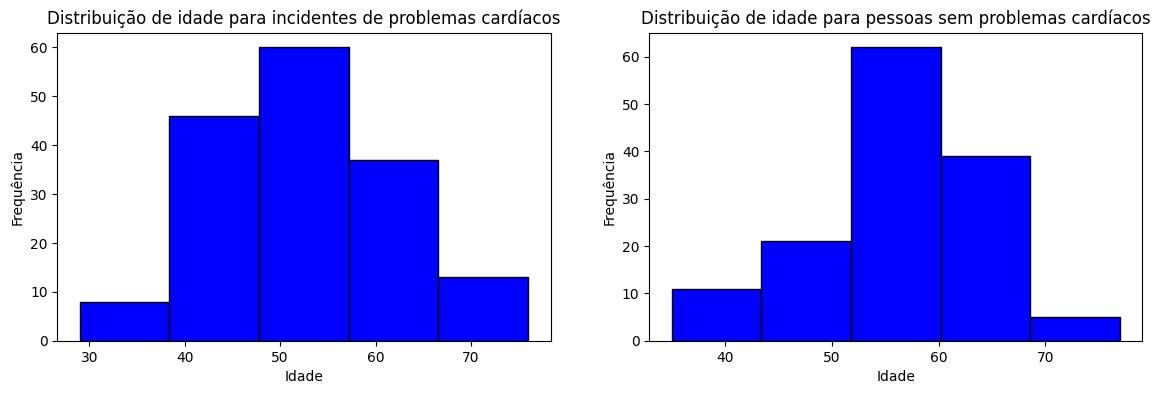

In [ ]:

fig, ax = plt.subplots(1,2, figsize = (14, 4))

# subplot1: idade para incidentes de problemas cardíacos
ax[0].hist(filtro1['Idade'], bins=5, edgecolor='black', color='blue')
ax[0].set_title('Distribuição de idade para incidentes de problemas cardíacos')
ax[0].set_ylabel('Frequência')
ax[0].set_xlabel('Idade')

# subplot2: idade para pessoas sem problemas cardíacos
ax[1].hist(filtro0['Idade'], bins=5, edgecolor='black', color='blue')
ax[1].set_title('Distribuição de idade para pessoas sem problemas cardíacos')
ax[1].set_ylabel('Frequência')
ax[1].set_xlabel('Idade')



Pode-se verificar que nos dois grupos a maioria das pessoas estão na faixa de 40 a 60 anos, sendo que a maioria das pessoas do grupo 1 estão mais próximas dos 50 anos e do grupo 0, mais próximas de 60 anos, o que é confirmado pela média das idades mostrada no resumo estatístico para os grupos.

Podemos visualizar a distribuição por sexo nos grupos através de um gráfico de barras:

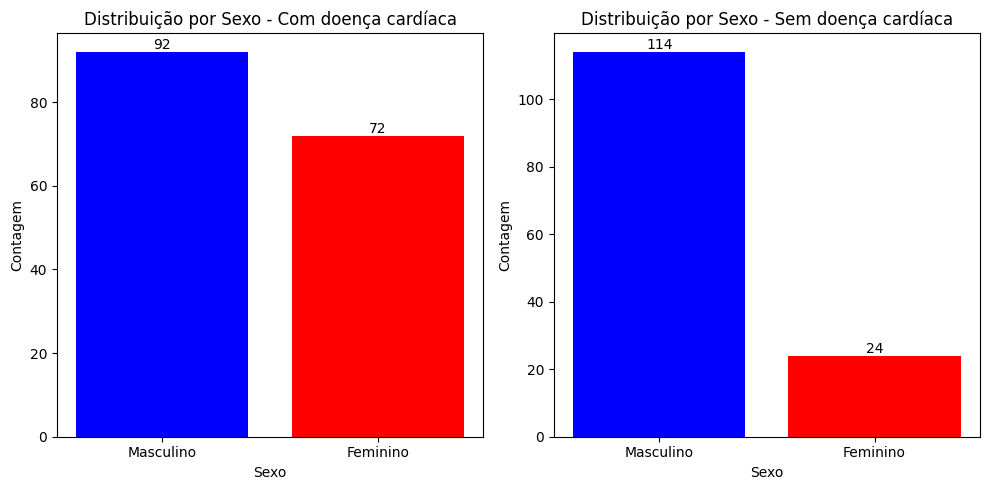

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico para filtro1
psexo1 = filtro1['Sexo'].value_counts()
psexo1.index = psexo1.index.map({0: 'Feminino', 1: 'Masculino'})
ax1.bar(psexo1.index, psexo1, color=['blue', 'red'])
ax1.set_title('Distribuição por Sexo - Com doença cardíaca')
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Contagem')

# Adicionar os números em cima das barras para filtro1
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# Gráfico para filtro0
psexo0 = filtro0['Sexo'].value_counts()
psexo0.index = psexo0.index.map({0: 'Feminino', 1: 'Masculino'})
ax2.bar(psexo0.index, psexo0, color=['blue', 'red'])
ax2.set_title('Distribuição por Sexo - Sem doença cardíaca')
ax2.set_xlabel('Sexo')
ax2.set_ylabel('Contagem')

# Adicionar os números em cima das barras para filtro0
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# Ajustar o layout para não sobrepor os títulos e rótulos
plt.tight_layout()

# Exibir os subplots
plt.show()

Verifica-se que em ambos os grupos, o número de pacientes do sexo masculino é maior, com um destaque para a grande diferença no grupo de pessoas sem doença cardíaca, nesse ponto, caso o atributo sexo for decisivo para um possível desenvolvimento de método de aprendizagem, o desbalanceamento desse grupo deve ser levado em conta.

Análise da distribuição das medidas de pressão arterial comparando os dois grupos.


Text(0.5, 0, 'PA')

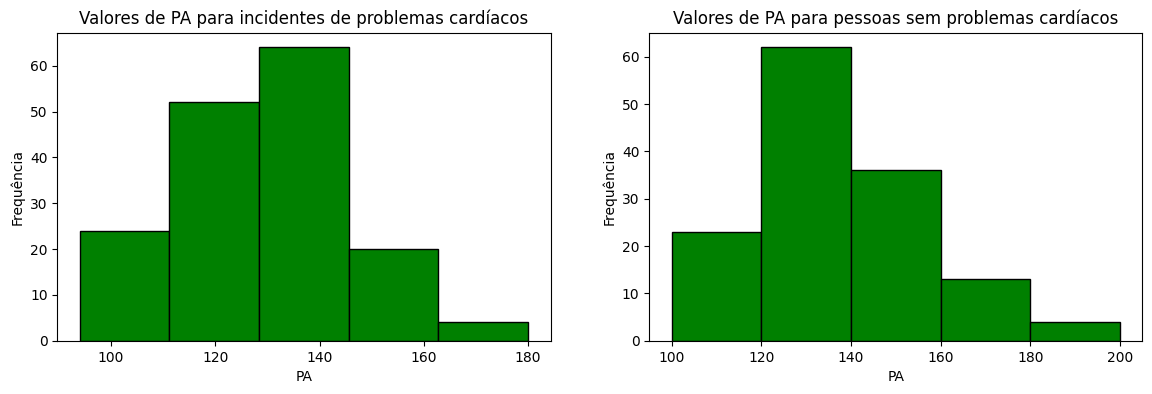

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (14, 4))

# subplot1: PA para incidentes de problemas cardíacos
ax[0].hist(filtro1['Pres no repouso'], bins=5, edgecolor='black', color='green')
ax[0].set_title('Valores de PA para incidentes de problemas cardíacos')
ax[0].set_ylabel('Frequência')
ax[0].set_xlabel('PA')

# subplot2: PA para pessoas sem problemas cardíacos
ax[1].hist(filtro0['Pres no repouso'], bins=5, edgecolor='black', color='green')
ax[1].set_title('Valores de PA para pessoas sem problemas cardíacos')
ax[1].set_ylabel('Frequência')
ax[1].set_xlabel('PA')


Para uma melhor visualização dos dados anteriores, será feita uma apresentação em gráficos de distribuição/densidade, deixando em evidência ainda os valores mais altos em cada distribuição usando o Seaborn.

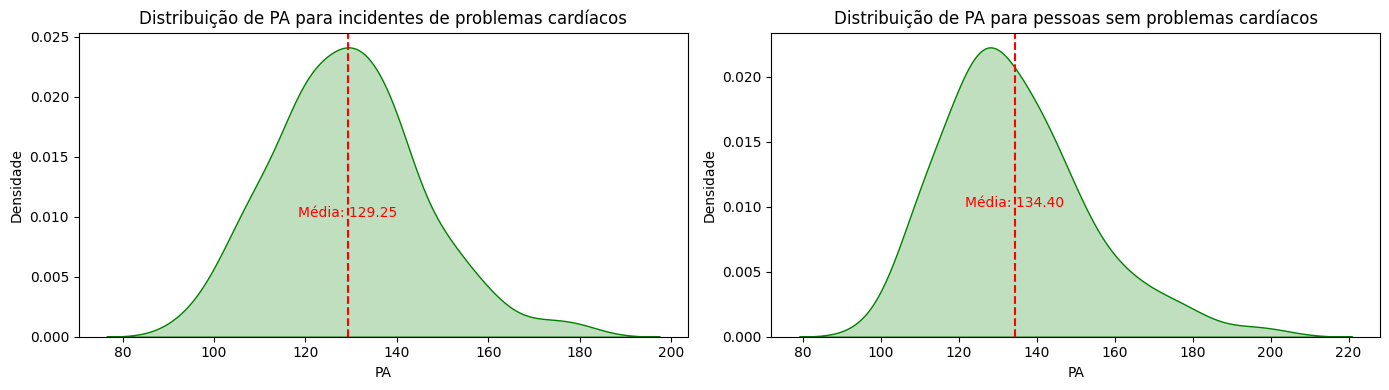

In [ ]:
# Criar a figura e subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# subplot1: Gráfico de densidade (KDE) para incidentes de problemas cardíacos
sns.kdeplot(filtro1['Pres no repouso'], ax=ax[0], color='green', shade=True)

# Encontrar o valor do ponto mais alto (máximo da densidade)
max_density_value1 = filtro1['Pres no repouso'].mean()
ax[0].axvline(max_density_value1, color='red', linestyle='--')  # Adicionar linha do centro da distribuição no ponto mais alto
ax[0].text(max_density_value1, 0.01, f'Média: {max_density_value1:.2f}', color='red', ha='center')
ax[0].set_title('Distribuição de PA para incidentes de problemas cardíacos')
ax[0].set_ylabel('Densidade')
ax[0].set_xlabel('PA')

# subplot2: Gráfico de densidade (KDE) para pessoas sem problemas cardíacos
sns.kdeplot(filtro0['Pres no repouso'], ax=ax[1], color='green', shade=True)

# Encontrar o valor do ponto mais alto (máximo da densidade)
max_density_value0 = filtro0['Pres no repouso'].mean()
ax[1].axvline(max_density_value0, color='red', linestyle='--')
ax[1].text(max_density_value0, 0.01, f'Média: {max_density_value0:.2f}', color='red', ha='center')
ax[1].set_title('Distribuição de PA para pessoas sem problemas cardíacos')
ax[1].set_ylabel('Densidade')
ax[1].set_xlabel('PA')

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

A partir dos gráficos de distribuição acima pode-se notar uma diferença que pode ser relevante em relação aos dois grupos, a maioria das pessoas sem doenças cardíacas possui medidas de PA abaixo da média para o grupo, enquanto que no grupo de incidentes a distribuição se mostra mais símetrica. O fato de a média de PA para o grupo de pessoas sem problemas cardíacos ser maior, chama a atenção para o número de pessoas com valores altos de PA nesse grupo, indicando que certa atenção deve ser direcionada para esse caso, uma vez que o fator PA está diretamente relacionado com doenças cardícas.

Qual a distribuição das concentrações de colesterol para os dois grupos?

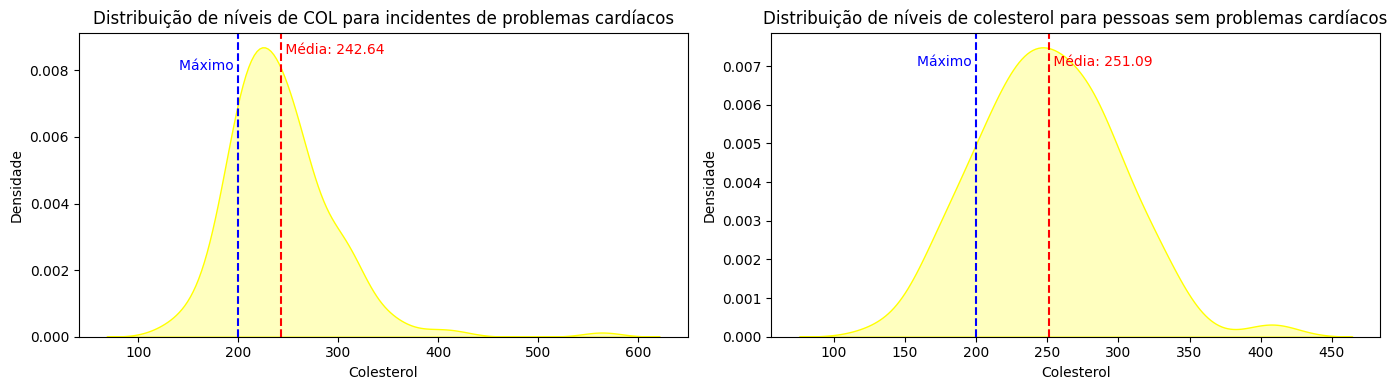

In [ ]:
# Criar a figura e subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# subplot1: Gráfico de densidade (KDE) para incidentes de problemas cardíacos
sns.kdeplot(filtro1['Colesterol'], ax=ax[0], color='yellow', shade=True)

# Encontrar o valor da média e do valor máximo recomendado
max_density_value1 = filtro1['Colesterol'].mean()
ax[0].axvline(max_density_value1, color='red', linestyle='--')  # Adicionar linha do centro da distribuição no ponto mais alto
ax[0].text(max_density_value1, 0.0085, f' Média: {max_density_value1:.2f}', color='red', ha='left')
ax[0].axvline(200, color='blue', linestyle='--')
ax[0].text(200, 0.008, f'Máximo ', color='blue', ha='right')
ax[0].set_title('Distribuição de níveis de COL para incidentes de problemas cardíacos')
ax[0].set_ylabel('Densidade')
ax[0].set_xlabel('Colesterol')

# subplot2: Gráfico de densidade (KDE) para pessoas sem problemas cardíacos
sns.kdeplot(filtro0['Colesterol'], ax=ax[1], color='yellow', shade=True)

# Encontrar o valor da média e do valor máximo recomendado
max_density_value0 = filtro0['Colesterol'].mean()
ax[1].axvline(max_density_value0, color='red', linestyle='--')
ax[1].text(max_density_value0, 0.007, f' Média: {max_density_value0:.2f}', color='red', ha='left')
ax[1].axvline(200, color='blue', linestyle='--')
ax[1].text(200, 0.007, f'Máximo ', color='blue', ha='right')
ax[1].set_title('Distribuição de níveis de colesterol para pessoas sem problemas cardíacos')
ax[1].set_ylabel('Densidade')
ax[1].set_xlabel('Colesterol')

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

 Os gráficos acima mostram a distribuição das pessoas dos dois grupos em relação aos níveis de colesterol. A linha azul apresenta o valor recomendado (200 mg/dl) e a linha vermelha representa o valor médio para cada grupo. Através dos gráficos pode-se notar que ambos os grupos apresentaram a maioria das pessoas com valores de colesterol acima do valor recomendado. Indicando que este índice pode não ser a melhor escolha para a indicação de um fator causador de doenças cardíacas nessa amostra.

Outro fator tratado nos dados atuais foi o nível de áçucar no sangue, sendo uma váriavel categorizada como 1 para valores maiores que 120 mg/dl (fator de risco) e 0 para valores menores ou igual.
Os gráficos a seguir mostram a comparação entre os dois grupos desses dados.

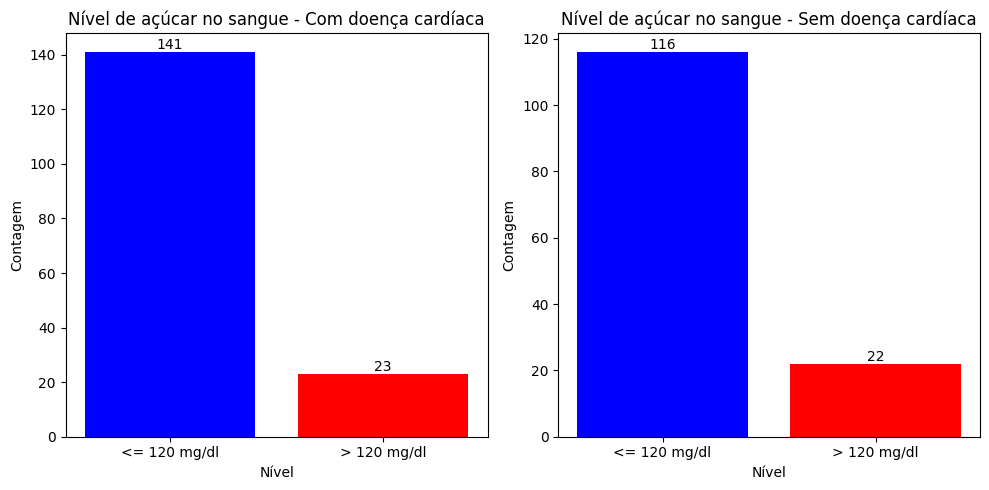

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico para filtro1
pacucar1 = filtro1['Açúcar no sangue'].value_counts()
pacucar1.index = pacucar1.index.map({0: '<= 120 mg/dl', 1: '> 120 mg/dl'})
ax1.bar(pacucar1.index, pacucar1, color=['blue', 'red'])
ax1.set_title('Nível de açúcar no sangue - Com doença cardíaca')
ax1.set_xlabel('Nível')
ax1.set_ylabel('Contagem')

# Adicionar os números em cima das barras para filtro1
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# Gráfico para filtro0
pacucar0 = filtro0['Açúcar no sangue'].value_counts()
pacucar0.index = pacucar0.index.map({0: '<= 120 mg/dl', 1: '> 120 mg/dl'})
ax2.bar(pacucar0.index, pacucar0, color=['blue', 'red'])
ax2.set_title('Nível de açúcar no sangue - Sem doença cardíaca')
ax2.set_xlabel('Nível')
ax2.set_ylabel('Contagem')

# Adicionar os números em cima das barras para filtro0
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# Ajustar o layout para não sobrepor os títulos e rótulos
plt.tight_layout()

# Exibir os subplots
plt.show()

Como pode ser observado, não foram apresentadas diferenças de perfis significativas entre os dois grupos, indicando que, **nos dados atuais** o fator "Nível de açúcar no sangue" analisado isoladamente não é uma variável determinante de incidência de doença cardíaca.

A seguir, foi analisado o fator "Eletro em repouso" que trata das anormalidades para valores obtidos por eletrocardiograma. Os resultados foram categorizados em 0 para normalidade, 1 para anormalidade e 2 para hipertrofia. Os gráficos a seguir apresentam as incidências desses valores comparando os dois grupos.

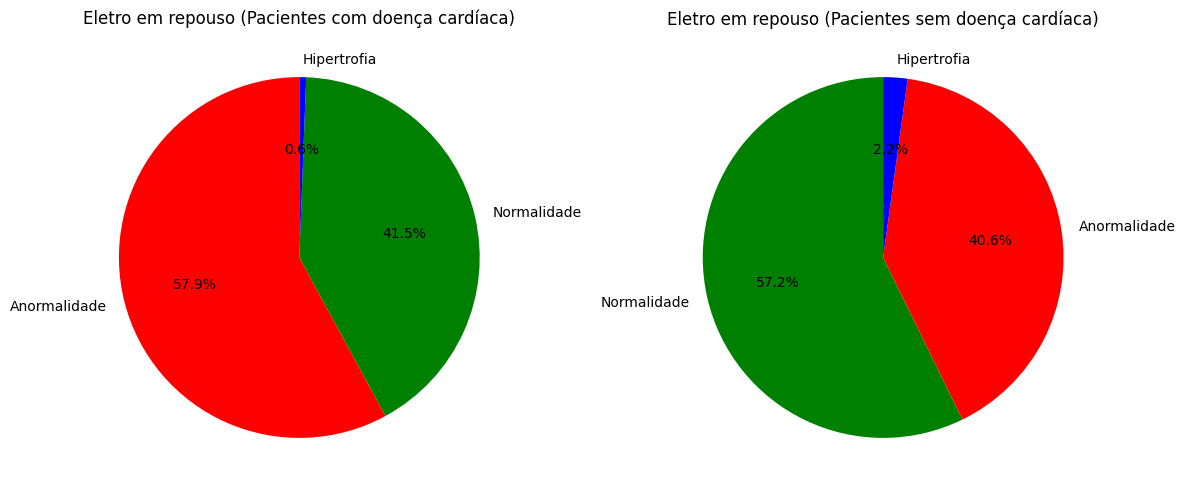

In [ ]:
#fig, ax = plt.subplots(figsize = (10, 5))
#Para pessoas que são incidentes de doenças cardícas:
filtro1['Eletro em repouso'] = filtro1['Eletro em repouso'].replace({0: 'Normalidade', 1: 'Anormalidade', 2: 'Hipertrofia'})
peletro1 = filtro1['Eletro em repouso'].value_counts()
labels1 = ['Anormalidade', 'Normalidade', 'Hipertrofia']

#Para pessoas que não possuem doença cardíaca:
filtro0['Eletro em repouso'] = filtro0['Eletro em repouso'].replace({0: 'Normalidade', 1: 'Anormalidade', 2: 'Hipertrofia'})
peletro0 = filtro0['Eletro em repouso'].value_counts()

labels0 = ['Normalidade', 'Anormalidade', 'Hipertrofia']
# Constrói gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pizza para filtro1
ax[0].pie(peletro1, labels=labels1, autopct="%1.1f%%", startangle=90, colors=['red', 'green', 'blue'])
ax[0].set_title("Eletro em repouso (Pacientes com doença cardíaca)")

# Gráfico de pizza para filtro0
ax[1].pie(peletro0, labels=labels0, autopct="%1.1f%%", startangle=90, colors=['green', 'red', 'blue'])
ax[1].set_title("Eletro em repouso (Pacientes sem doença cardíaca)")

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Exibe o gráfico
plt.show()

Como pode ser visto na figura anterior, existe uma clara diferença entre os grupos, o grupo com doença cardíaca apresentou a maioria dos resultados com anormalidade (59,7%), enquanto que o grupo sem doenças cardíacas apresentou um percentual de 40,6% de resultados anormais. Como este é um fator indicativo de doenças cardíacas, os resultados estão alinhados com os resultados apresentados no dataset.

A seguir serão apresentados os dados de Frequência máxima cardíaca. A frequência cardíaca máxima foi registrada durante o teste de estresse com tálio. O conjunto de dados mostra que a frequência cardíaca máxima saudável ideal depende da idade (220 - idade). Assim, taxas mais altas tendem a ser de pacientes mais jovens. Dessa forma, a figura mostra uma comparação entre os valores normais e os valores medidos para cada grupo.

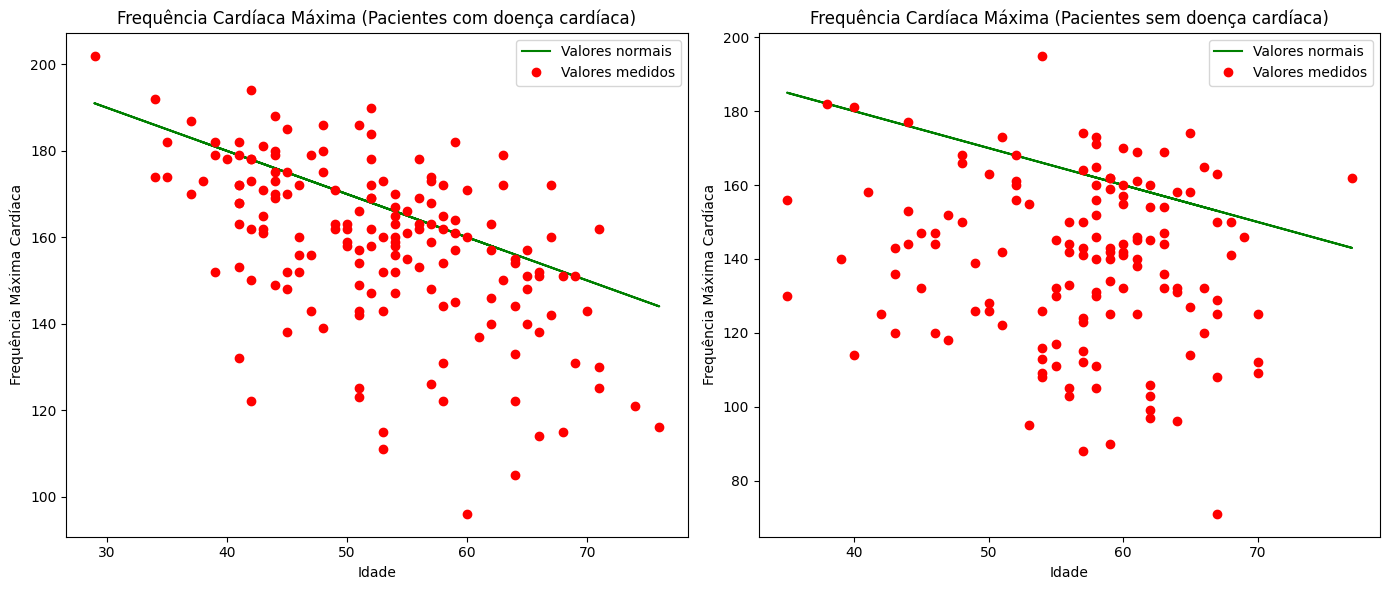

In [ ]:
x1 = filtro1['Idade']

# Linha verde (Valores normais) e pontos vermelhos (Valores medidos) para filtro1
valores_normais1 = 220 - filtro1['Idade']
valores_medidos1 = filtro1['FCM']

# Dados do eixo x: Idade para filtro0
x2 = filtro0['Idade']

# Linha verde (Valores normais) e pontos vermelhos (Valores medidos) para filtro0
valores_normais2 = 220 - filtro0['Idade']
valores_medidos2 = filtro0['FCM']

# Criar a figura com dois subplots (um para filtro1 e outro para filtro0)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os dados de filtro1 no primeiro gráfico
ax[0].plot(x1, valores_normais1, color='green', label='Valores normais')
ax[0].plot(x1, valores_medidos1, 'ro', label='Valores medidos')  # Pontos vermelhos
ax[0].set_title('Frequência Cardíaca Máxima (Pacientes com doença cardíaca)')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Frequência Máxima Cardíaca')
ax[0].legend()

# Plotar os dados de filtro0 no segundo gráfico
ax[1].plot(x2, valores_normais2, color='green', label='Valores normais')
ax[1].plot(x2, valores_medidos2, 'ro', label='Valores medidos')  # Pontos vermelhos
ax[1].set_title('Frequência Cardíaca Máxima (Pacientes sem doença cardíaca)')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Frequência Máxima Cardíaca')
ax[1].legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

Pode-se observar na figura que o número de pessoas com valores de FMC acima dos valores normais esperados para a idade é muito maior no grupo de pessoas com doenças cardíacas, indicando que esses dados de FMC mostram uma distinção entre os dois grupos.

###Angina induzida por exercício

Por fim será feita uma comparação dos resultados de angina induzida por exercício (dor no peito), que é um indicativo de doença cardíaca, para os dois grupos.



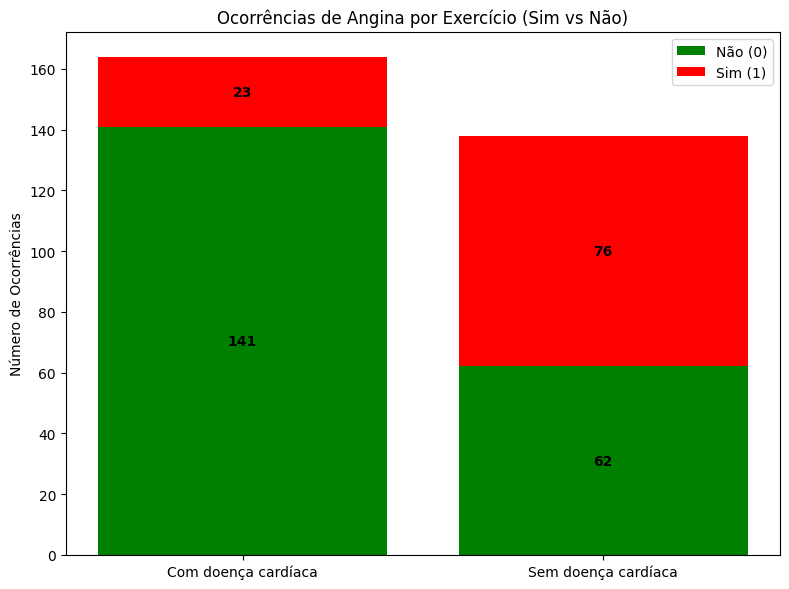

In [ ]:
# Contagem de ocorrências para a coluna "Angina por exerc" em filtro1
pangina1 = filtro1['Angina por exerc'].value_counts().sort_index()

# Contagem de ocorrências para a coluna "Angina por exerc" em filtro0
pangina0 = filtro0['Angina por exerc'].value_counts().sort_index()

# Valores para cada dataset
valores_filtro1_nao = pangina1[0] if 0 in pangina1 else 0
valores_filtro1_sim = pangina1[1] if 1 in pangina1 else 0
valores_filtro0_nao = pangina0[0] if 0 in pangina0 else 0
valores_filtro0_sim = pangina0[1] if 1 in pangina0 else 0

# Gráfico de barras empilhadas
labels = ['Com doença cardíaca', 'Sem doença cardíaca']
nao = [valores_filtro1_nao, valores_filtro0_nao]
sim = [valores_filtro1_sim, valores_filtro0_sim]

# Criar a figura
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar barras empilhadas
ax.bar(labels, nao, color='green', label='Não (0)')
ax.bar(labels, sim, bottom=nao, color='red', label='Sim (1)')

# Adicionar rótulos
for i, label in enumerate(labels):
    ax.text(i, nao[i] / 2, str(nao[i]), ha='center', va='center', color='black', fontweight='bold')
    ax.text(i, nao[i] + (sim[i] / 2), str(sim[i]), ha='center', va='center', color='black', fontweight='bold')

# Adicionar título e legenda
ax.set_title('Ocorrências de Angina por Exercício (Sim vs Não)')
ax.set_ylabel('Número de Ocorrências')
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

Como pode ser observado no gráfico de barras empilhadas, o grupo com doença cardíaca apresentou uma proporção de incidências de angina induzida por exercício muito menor que o grupo sem doenças cardíacas, o que pode indicar uma inconsistência, ou uma inversão dos dados dessa coluna em relação à coluna que indica a presença ou ausência de doença cardíaca (Coluna Resultado).

Para verificar se os dados plotados estão corretos podemos exibir os valores usados nos filtros para a construção do gráfico.

In [ ]:
print('Contagem para resultados para o grupo com doença cardíaca:', pangina1)
print('Contagem para resultados para o grupo sem doença cardíaca:', pangina0)

Contagem para resultados para o grupo com doença cardíaca: Angina por exerc
0    141
1     23
Name: count, dtype: int64
Contagem para resultados para o grupo sem doença cardíaca: Angina por exerc
0    62
1    76
Name: count, dtype: int64


#Conclusões

Através da análise minuciosa e visualiazação dos dados das colunas de dados de mais fácil interpretação, do grupo com doença cardíaca em comparação com o grupo sem doença cardíaca, pode-se verificar que podem existir dados que de certa forma não agregariam nada a um possível processo de aprendizado supervisionado, por exemplo, colunas Idade, PA e açucar no sangue. Outros dados estão fortemente desbalanceados para um grupo e equilibrado para outro como a coluna Sexo. Outras colunas mostram inconsistencia como a coluna 'Angina por exerc' que possui dados que vão de forma oposta aos resultados apresentados no dataset.

Conclui-se que para um bom uso dos dados para um processo de aprendizado de máquina, deve-se fazer uma análise prelimimar dos dados com uma boa comparação entre as respostas, muitas vezes essas inconsistências podem não ser percebidas e atrapalhar ou produzir métodos errados de classificação, por exemplo.